In [68]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor

In [41]:
df = pd.read_csv("communities.csv")
df

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.00,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.00,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.00,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.00,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.00,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,TempleTerracecity,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,...,0.00,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.09
1990,6,Seasidecity,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,...,0.00,0.53,0.25,0.17,0.10,0.00,0.02,0.37,0.20,0.45
1991,9,Waterburytown,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,...,0.02,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18,0.23
1992,25,Walthamcity,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,...,0.01,0.45,0.64,0.54,0.59,0.52,0.03,0.38,0.33,0.19


In [42]:
#remove variables state and communityname
df = df.drop(['state', 'communityname', 'OtherPerCap'], axis=1)

In [43]:
df.shape

(1994, 97)

In [44]:
df.describe()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,0.336264,0.423164,...,0.022778,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.237979
std,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,0.166505,0.179185,...,0.100400,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.232985
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,0.250000,0.300000,...,0.000000,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.070000
50%,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,0.290000,0.420000,...,0.000000,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.150000
75%,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,0.360000,0.530000,...,0.000000,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.330000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 97 columns):
population               1994 non-null float64
householdsize            1994 non-null float64
racepctblack             1994 non-null float64
racePctWhite             1994 non-null float64
racePctAsian             1994 non-null float64
racePctHisp              1994 non-null float64
agePct12t21              1994 non-null float64
agePct12t29              1994 non-null float64
agePct16t24              1994 non-null float64
agePct65up               1994 non-null float64
numbUrban                1994 non-null float64
pctUrban                 1994 non-null float64
medIncome                1994 non-null float64
pctWWage                 1994 non-null float64
pctWFarmSelf             1994 non-null float64
pctWInvInc               1994 non-null float64
pctWSocSec               1994 non-null float64
pctWPubAsst              1994 non-null float64
pctWRetire               1994 non-null float64


In [46]:
x = np.array(df.drop('ViolentCrimesPerPop', axis=1))
y = np.array(df.ViolentCrimesPerPop)

In [47]:
x.shape

(1994, 96)

In [53]:
X = np.array(x)
X = np.array([np.concatenate((v,[1])) for v in X])

In [54]:
def standRegres(xArr,yArr):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0:
        print ("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws

In [55]:
w = standRegres(X,y)
w

matrix([[ 1.71558376e-01],
        [-3.24227540e-02],
        [ 2.13001996e-01],
        [-3.53111948e-02],
        [-1.15030568e-02],
        [ 5.59928026e-02],
        [ 1.33783940e-01],
        [-2.20105094e-01],
        [-1.56876513e-01],
        [ 4.80916187e-02],
        [-2.82311628e-01],
        [ 4.75372551e-02],
        [-1.97215043e-01],
        [-2.06170464e-01],
        [ 4.55466994e-02],
        [-1.72121218e-01],
        [ 6.60123650e-02],
        [ 1.03090013e-02],
        [-9.28253696e-02],
        [ 2.72974296e-01],
        [ 8.72780119e-02],
        [-3.18675895e-01],
        [-2.61123517e-02],
        [-3.51269237e-02],
        [ 2.07206032e-02],
        [ 5.14640260e-02],
        [ 1.30205597e-01],
        [-1.91542193e-01],
        [-1.00121959e-01],
        [ 6.35842932e-02],
        [ 1.03938542e-01],
        [ 1.22805442e-04],
        [ 2.35359837e-01],
        [-3.80798256e-02],
        [-1.03809490e-02],
        [ 4.69825946e-01],
        [ 2.21905319e-01],
 

In [58]:
#calculate rmse

y_hat = X * w

y_hat_transposed = y_hat.T

err = abs(y_hat_transposed - y)

total_error = np.dot(err,err.T)

rmse_train = np.sqrt(total_error/len(y_hat))
print (rmse_train)

[[0.12906931]]


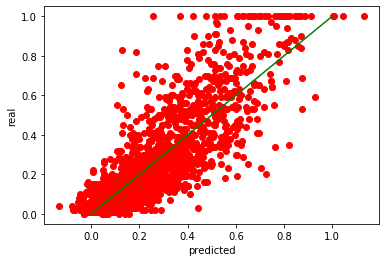

In [73]:
#correlation between predicted and actual values of target
import pylab as pl

%matplotlib inline
pl.plot(y_hat, y,'ro')
pl.plot([0,1],[0,1], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

In [69]:
# Now let's compute RMSE using 10-fold x-validation

from sklearn.model_selection import KFold

linreg = LinearRegression()

n = 10

kf = KFold(n_splits=n)
kf.get_n_splits(X)
 

xval_err = 0
for train, test in kf.split(X):
    linreg.fit(X[train],y[train])
    p = linreg.predict(X[test])
    e = p-y[test]
    xval_err += np.sqrt(np.dot(e,e)/len(X[test]))
       
rmse_10cv = xval_err/n

In [70]:
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Simple Linear Regression
RMSE on training: 0.1291
RMSE on 10-fold CV: 0.1360


In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [79]:
X_copy = pd.DataFrame(X)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: divid

1 -0.023938152299136463
6 -0.020767025182979137
11 -0.020271824208416396
16 -0.02001268611292727
21 -0.019426510274453506
26 -0.018876545306154516
31 -0.018479701713035
36 -0.018448505978783815
41 -0.01840854926015652
46 -0.018488065897652933
51 -0.01852519482304136
56 -0.01845356051086677
61 -0.018374313014347422
66 -0.018358074164138382
71 -0.0184093380110054
76 -0.018192659087415193
81 -0.018217576093186978
86 -0.018182466072982857
91 -0.01819064317492661
96 -0.018173411761052576
19
Optimal percentile of features:96 

Optimal number of features:93 



/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: divid

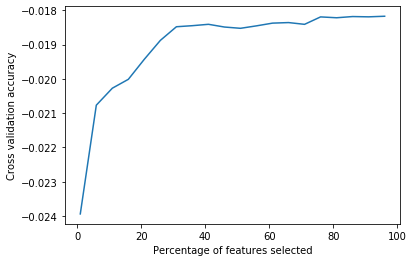

In [80]:
from sklearn import feature_selection
from sklearn import model_selection

percentiles = range(1, 100, 5)
results = []
for i in range(1, 100, 5):
    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
    X_train_fs = fs.fit_transform(X_train, y_train)
    scores = model_selection.cross_val_score(linreg, X_train_fs, y_train, cv=5, scoring='neg_mean_squared_error')
    print (i,scores.mean())
    results = np.append(results, scores.mean())

optimal_percentile = np.where(results == results.max())[0]
print(optimal_percentile[0])
print ("Optimal percentile of features:{0}".format(percentiles[optimal_percentile[0]]), "\n")
optimal_num_features = int(percentiles[optimal_percentile[0]]*len(X_copy.columns)/100)
print ("Optimal number of features:{0}".format(optimal_num_features), "\n")

# Plot percentile of features VS. cross-validation scores
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles,results)

In [89]:
ridge = Ridge()

In [82]:
def calc_params(X, y, clf, param_values, param_name, K):
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing scores with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        print (param_name, ' = ', param_value)
        
        # set classifier parameters
        clf.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        #cv = KFold(len(X), K, shuffle=True, random_state=0)
        
        cv = KFold(n_splits=K)
        cv.get_n_splits(X) 
        cv = KFold(n_splits=K,random_state=None, shuffle=False)
        
        # iterate over the K folds
        for j, (train, test) in enumerate(cv.split(X)):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit([X[k] for k in train], y[train])
            k_train_scores[j] = clf.score([X[k] for k in train], y[train])
            k_test_scores[j] = clf.score([X[k] for k in test], y[test])
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
       
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

In [87]:
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

alpha  =  1e-15
alpha  =  1e-10
alpha  =  1e-08
alpha  =  0.0001
alpha  =  0.001
alpha  =  0.01
alpha  =  1
alpha  =  5


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.59198e-19): result may not be accurate.
  overwrite_a=True).T
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.78859e-19): result may not be accurate.
  overwrite_a=True).T
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.71362e-19): result may not be accurate.
  overwrite_a=True).T
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.59904e-19): result may not be accurate.
  overwrite_a=True).T
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.59092e-19): result may not be accurate.
  overwrite_a=True).T


alpha  =  10
alpha  =  20


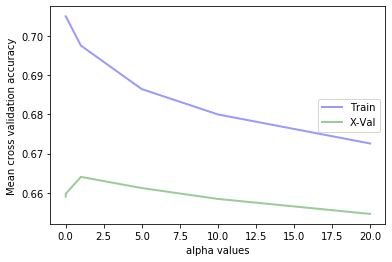

In [88]:
train_scores, test_scores = calc_params(X_train, y_train, ridge, alpha_ridge, 'alpha', 5)

In [90]:
#I am selecting alpha value as 10 because the gap between the validation and trainng error 
##is the least(less overfitting) at that point but still the accurcaies are high as possible
#lets select the best alpha = 10 and then predict on the test set
ridge1 = Ridge(alpha = 10)
ridge1.fit(X_train, y_train)
p = ridge1.predict(X_test)
p

array([ 7.00723782e-02,  1.81941996e-01,  6.99006942e-01,  2.98058453e-01,
        3.12601367e-01,  4.67225804e-01,  5.94159862e-04,  2.20751653e-01,
        1.46817944e-01,  4.84843371e-03,  4.34808025e-01,  4.75765267e-01,
        1.46279840e-01,  1.48826278e-01,  6.09218272e-01,  1.30008460e-03,
        2.62787245e-01,  2.30444600e-01,  6.31984405e-02,  2.39497820e-01,
        1.96766394e-02,  2.32971078e-01,  4.02429879e-01,  1.55021276e-01,
        3.86217018e-01,  3.78732276e-02,  4.35212523e-01,  5.48600501e-01,
        8.90294859e-02,  2.08190194e-01,  1.89588196e-01,  3.93914021e-01,
        3.87584629e-01,  2.72581893e-01,  2.89241139e-01,  3.57928818e-01,
        6.68639889e-01,  1.58373350e-01,  2.70014497e-02,  1.93936151e-01,
        1.55129937e-01,  7.76457528e-02,  5.97386420e-02,  1.80570080e-01,
        2.62432495e-01,  1.52080762e-01,  3.53283145e-01,  6.00837174e-01,
        2.57214720e-01,  9.26240949e-02,  4.68518290e-01,  8.89613930e-02,
        3.09996069e-01,  

In [94]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler1 = StandardScaler()
scaler.fit(X_train)
scaler1.fit(X_test)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler1.transform(X_test)


sgdreg = SGDRegressor()

In [96]:
from sklearn.model_selection import GridSearchCV

params = dict(
    penalty = ['l1', 'l2'],
    alpha = [0.0001, 0.002, 0.03, 0.4, 2, 4, 6, 8, 10]
)

gs = GridSearchCV(estimator=sgdreg, param_grid=params, scoring=None, cv=5, n_jobs=-1, )
gs.fit(X_train_scaled, y_train)
gs.best_estimator_
best_estimator = gs.best_estimator_
pred = best_estimator.predict(X_test_scaled)
pred

array([-1.21710424e-02,  1.71676957e-01,  8.24076301e-01,  3.15517510e-01,
        3.02512362e-01,  4.66575958e-01, -6.62524185e-02,  2.11259470e-01,
        9.11522217e-02, -7.71859728e-02,  4.91403119e-01,  5.35961956e-01,
        5.47104725e-02,  7.05675715e-02,  6.89781445e-01, -7.79294149e-02,
        2.44125585e-01,  2.41669336e-01,  2.28338072e-02,  2.07796808e-01,
       -2.36699096e-02,  1.97790855e-01,  3.90717952e-01,  1.25258946e-01,
        4.37429254e-01, -1.76779439e-02,  4.75749389e-01,  6.09904233e-01,
        1.48636774e-02,  1.75393764e-01,  1.81515971e-01,  5.39909468e-01,
        5.09634567e-01,  2.58357472e-01,  3.42660881e-01,  4.34967404e-01,
        7.31785528e-01,  1.30054799e-01, -7.46826310e-02,  1.63314804e-01,
        1.52006363e-01,  3.51742536e-02, -1.82863726e-02,  1.71196068e-01,
        2.97652733e-01,  1.39904489e-01,  3.53215974e-01,  6.82969684e-01,
        2.52404791e-01,  4.16214748e-02,  5.18581410e-01,  3.93408024e-02,
        2.94412469e-01,  

In [97]:
#this was the estimator that was chosen by Grid search CV
gs.best_estimator_

SGDRegressor(alpha=0.03, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

l1_ratio  =  0
l1_ratio  =  0.2
l1_ratio  =  0.4
l1_ratio  =  0.6
l1_ratio  =  0.8
l1_ratio  =  1.0


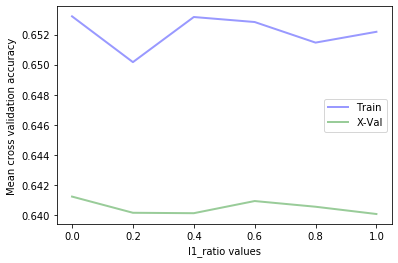

In [98]:
sgdreg1 = SGDRegressor(penalty = "elasticnet")
ratio_params = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
train_scores, test_scores = calc_params(X_train, y_train, sgdreg1, ratio_params, 'l1_ratio', 5)

In [99]:
##lets use the l1_ratio = 0.2 because that when the gap between training and accurcay and validation accurcay is the
#least and hence less overfitting
sgdreg2 = SGDRegressor(penalty = "elasticnet", l1_ratio = 0.2)
sgdreg2.fit(X_train_scaled, y_train)
pred1 = sgdreg2.predict(X_test_scaled)
pred1

array([-2.73050596e-02,  1.69928654e-01,  7.73756491e-01,  2.91629431e-01,
        3.23443295e-01,  4.87886802e-01, -5.73545305e-02,  1.75007758e-01,
        1.21257820e-01, -7.97775883e-02,  5.09077477e-01,  5.26198347e-01,
        6.91593775e-02,  9.54070630e-02,  6.49915108e-01, -7.16888808e-02,
        2.64966034e-01,  2.05424028e-01,  1.66264756e-02,  2.23762340e-01,
        6.41346998e-03,  1.97253179e-01,  4.30716880e-01,  1.35823907e-01,
        4.10064652e-01,  5.16984534e-04,  4.82045944e-01,  6.12475956e-01,
        5.04895435e-02,  1.74880458e-01,  1.91319803e-01,  4.54979123e-01,
        4.26157976e-01,  2.63867171e-01,  3.39409061e-01,  3.71786087e-01,
        7.05440013e-01,  1.32178672e-01, -1.34568696e-02,  1.58603789e-01,
        1.40342946e-01,  8.20255652e-02, -1.09936425e-02,  1.65619141e-01,
        2.74006291e-01,  1.28620745e-01,  3.41010206e-01,  6.30265817e-01,
        2.47591003e-01,  7.38221053e-02,  4.81927943e-01,  7.37396315e-02,
        3.01023880e-01,  

In [100]:
## The linear regression without the 10 fold cross validation was more accuracte,
## the ridge regression was able to reduce overfitting in the model
## and stochastic gradient decsent regression is a more optimized way of finding the parameters
# and it will just be quicker on larger data sets. 